<a href="https://colab.research.google.com/github/kalwraith/GAN_handwriting/blob/main/font2img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import argparse
import sys
import glob
import numpy as np
import io, os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import collections

In [20]:
def draw_single_char(ch, font, canvas_size):

    # image.new(mode,size,color) / L: 흑백모드
    image = Image.new('L', (canvas_size, canvas_size), color=255)
    drawing = ImageDraw.Draw(image)
    w, h = drawing.textsize(text=ch, font=font)
    drawing.text(
        ((canvas_size-w)/2, (canvas_size-h)/2),
        text=ch,
        fill=(0),
        font=font
    )
    flag = np.sum(np.array(image))
    
    # 해당 font에 글자가 없으면 return None
    if flag == 255 * 128 * 128:
        return None
    
    return image

In [40]:
def draw_example(ch, src_font, dst_font, canvas_size):
    dst_img = draw_single_char(ch, dst_font, canvas_size)
    
    # 해당 font에 글자가 없으면 return None
    if not dst_img:
        return None
    
    src_img = draw_single_char(ch, src_font, canvas_size)
    example_img = Image.new("RGB", (canvas_size * 2, canvas_size), (255, 255, 255)).convert('L')
    example_img.paste(dst_img, (0, 0))
    example_img.paste(src_img, (canvas_size, 0))   
    return example_img

In [5]:
%cd /content/drive/MyDrive/Colab/GAN_handwriting


/content/drive/MyDrive/Colab/GAN_handwriting


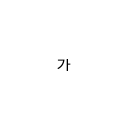

In [43]:
src_font = ImageFont.truetype('/content/drive/MyDrive/Colab/GAN_handwriting/fonts/source/source_font.ttf', 15)
draw_single_char('가',src_font,128)



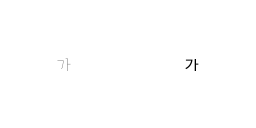

In [44]:
tgt_font = ImageFont.truetype('/content/drive/MyDrive/Colab/GAN_handwriting/fonts/target/02.ttf', 15)
draw_example('가',src_font,tgt_font,128)

origin	https://github.com/kalwraith/GAN_handwriting.git (fetch)
origin	https://github.com/kalwraith/GAN_handwriting.git (push)


/content/drive/MyDrive/Colab/GAN_handwriting
fatal: could not read Username for 'https://github.com': No such device or address
